# 국민건강영양조사 자료 중 구강검사데이터셋
---
출처 : https://knhanes.cdc.go.kr/knhanes/main.do
   

### 1. 구강검사(검진조사) 
 - 질병관리본부에서 수행중인 국민건강양영조사 중 구강검진조사 데이터이다
 - 매년 만 1세 이상을 대상으로 치아와 보철물 상태, 치주조직 상태, 칫솔질 실천을 포함한 구강건강관련 행태의 자료를 수집하고 있다.
 - 구강검진은 구강설문조사, 치아상태, 치주조직검사로 이루어져 있다. 
 - 공중보건치과의를 선발하여 교육훈련과정을 이수한 조사원이 구강검진을 수행한다. 

<center>![구강검진](구강검진과정.png)</center>
<출처: 국민건강영양조사 조사수행지침>

#### 1.1 치아상태
----
각 치아번호마다 아래의 값으로 코딩한다.

0. 건전치면 : 우식증을 치료한 흔적이 없고, 전색된 흔적이 없으며, 우식증이 진행하고 있다는 증거가 보이지 않는 치면
1. 우식치면 : 치질의 파괴를 동반한 광범위한 검은 변색
3. 우식경험처치치면 : 진행 중인 우식증이 없고 영구수복물이 있는 치면
4. 우식경험상실치면 : 우식증으로 인하여 발거된 치아를 우식경험상실치면
5. 우식비경험상실치면 : 발거치아
6. 전색치면 : 소와 또는 열구가 치면열구전색재로 전색된 경험이 있는 치아
7. 우식비경험처치치면 : 우식외 치료 등으로 인한 처치된 치면
8. 미맹출치면 : 상실의 기억이 없는데 구강 내에 보이지 않는 모든 치아
9. 기록불가치면 : 기타 이유로 기록이 불가능한 치면(교정용 밴드로 치아가 보이지 않는 경우)
![구강검진](구강검진.png) 
<출처: 국민건강영양조사 조사수행지침>

#### 1.2. 치주질환
---
 - 치주질환(또는 치주병, 치주염)은 세균에 의해 발생되는 치아주위 잇몸의 염증성 질환으로 치주인대와 잇몸뼈의 파괴를 일으킨다.
 - 
 
![치주염](periodontitis.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


![치주탐침](cpi_probe.png)
<출처: 국민건강영양조사 조사수행지침>

 - 치주탐침을 잇몸에 찔러서 잇몸뼈의 위치까지 얼마나 깊이 들어가는지와 출혈을 관찰한다.
![치주낭검사](치주낭검사.png)
<출처: 대한치주과학회, http://www.kperio.org/patient/disease.php>


 - 치주질환은 국민건강영양조사 구강건강실태 조사방법에 따라 지역사회치주지수(Community Periodontal Index, CPI)를 이용하여 치과의사가 시진과 촉진으로 검진한다.
 - 만 19세 이상의 대상자의 구강 내 6분악 중 검사표준 치아 상·하악의 좌·우측 제 1,2 대구치, 상악 우측 중절치, 하악 좌측 중절치를 치주 탐침 시 치주낭 깊이가 4 mm 이상 보유자를 치주질환자로 분류한다
 - 데이터셋의 치주조직상태 변수인 O_CPI_UR, O_CPI_UM, O_CPI_UL, O_CPI_LL으로 산출한 지표이다.

## 신경망 학습 목적
---
    치주질환을 검사하기 위한 치주낭 측정기(periodonal probe)를 치아에 찌르게 되면 출혈(이상이 있을 경우)과 통증이 유발된다. 또한 모든 치아를 검사해야 하는데 이는 시간소모가 많고 힘든 작업으로 알려져 있다. 주기적인 엑스레이 검사와 치주낭 측정 검사를 해야 사전에 치료가 가능하지만 주기적으로 하기 힘든게 현실이다. 치아 상태를 이용하여 치주질환을 분류하고자 한다. 

In [1]:
import pandas as pd

dt_raw = pd.read_sas("hn_dental_adj.sas7bdat").dropna() 

In [2]:
dt_raw.head()

,ID,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,...,O_TN73,O_TN74,O_TN75,O_CPI_UR,O_CPI_UM,O_CPI_UL,O_CPI_LR,O_CPI_LM,O_CPI_LL,NO_CPI_34
6224,b'A851913501',1.0,72.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
6226,b'A851915601',2.0,81.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6227,b'A851917101',1.0,62.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6228,b'A851917102',2.0,56.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0
6229,b'A851917701',1.0,55.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#자료가 제대로 읽어들여졌는지 확인한다.
print(dt_raw.shape)

(20453, 299)


In [4]:
# 변수명 확인하기
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 299 entries, ID to NO_CPI_34
dtypes: float64(298), object(1)
memory usage: 46.8+ MB


In [5]:
# 자료를 복사하여 사용하고 원자료는 조작하지 않는다
dt = dt_raw.copy()

In [6]:
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 10) for i in range(19, 80, 10)]
dt['age']=dt.age.astype('int64')
dt['age'] = pd.cut(dt.age, range(19, 90, 10), right=False, labels=labels)

In [7]:
# 불필요한 변수 삭제
dt = dt.drop(columns = ['ID','O_CPI_UR','O_CPI_UM','O_CPI_UL','O_CPI_LL'], axis = 1)

In [8]:
dt.shape

(20453, 294)

In [9]:
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 치주질환 빈도 확인
import matplotlib.pyplot as plt
dt['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
#범주형 변수를 카테고리 속성으로 변경
for i in dt.columns:
    dt[i]=pd.Categorical(dt[i])

In [12]:
# 변경되었는지 확인
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 6224 to 29014
Columns: 294 entries, sex to NO_CPI_34
dtypes: category(294)
memory usage: 6.0 MB


In [13]:
##변경후 데이터 확인
dt.head()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
6224,1.0,69 - 79,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6226,2.0,79 - 89,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6227,1.0,59 - 69,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6228,2.0,49 - 59,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
6229,1.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 데이터셋 요약과 구분
---

In [16]:
# 요약 확인
dt.describe()

,sex,age,O_DIP,O_55B,O_55D,O_55O,O_55M,O_55L,O_54B,O_54D,...,O_TN82,O_TN81,O_TN71,O_TN72,O_TN73,O_TN74,O_TN75,O_CPI_LR,O_CPI_LM,NO_CPI_34
count,20453.0,20451,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0
unique,2.0,7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,2.0
top,2.0,49 - 59,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
freq,11796.0,4064,14251.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,20453.0,...,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,20452.0,12495.0,10773.0,14273.0


In [14]:
# 변수의 값 빈도 확인 
columns_list = dt.columns

In [16]:
for i in columns_list:
    print(dt[i].value_counts())

2.0    11796
1.0     8657
Name: sex, dtype: int64
49 - 59    4064
39 - 49    3768
59 - 69    3591
29 - 39    3343
69 - 79    2739
19 - 29    2226
79 - 89     720
Name: age, dtype: int64
0.0    14251
1.0     6202
Name: O_DIP, dtype: int64
9.0    20453
Name: O_55B, dtype: int64
9.0    20453
Name: O_55D, dtype: int64
9.0    20453
Name: O_55O, dtype: int64
9.0    20453
Name: O_55M, dtype: int64
9.0    20453
Name: O_55L, dtype: int64
9.0    20453
Name: O_54B, dtype: int64
9.0    20453
Name: O_54D, dtype: int64
9.0    20453
Name: O_54O, dtype: int64
9.0    20453
Name: O_54M, dtype: int64
9.0    20453
Name: O_54L, dtype: int64
9.0    20453
Name: O_53B, dtype: int64
9.0    20453
Name: O_53D, dtype: int64
9.0    20453
Name: O_53M, dtype: int64
9.0    20453
Name: O_53L, dtype: int64
9.0    20453
Name: O_52B, dtype: int64
9.0    20453
Name: O_52D, dtype: int64
9.0    20453
Name: O_52M, dtype: int64
9.0    20453
Name: O_52L, dtype: int64
9.0    20453
Name: O_51B, dtype: int64
9.0    20453
Name: O_

0.0    11616
3.0     3646
4.0     2906
5.0     1274
7.0      677
1.0      319
9.0       10
8.0        4
6.0        1
Name: O_26M, dtype: int64
0.0    7941
3.0    6939
4.0    2906
5.0    1274
7.0     679
1.0     538
6.0     172
8.0       4
Name: O_26O, dtype: int64
0.0    11976
3.0     3315
4.0     2906
5.0     1274
7.0      679
1.0      288
9.0       10
8.0        4
6.0        1
Name: O_26D, dtype: int64
0.0    10293
3.0     4872
4.0     2906
5.0     1274
7.0      681
1.0      352
6.0       61
9.0       10
8.0        4
Name: O_26L, dtype: int64
0.0    12842
4.0     2834
3.0     2080
5.0     1437
7.0      982
1.0      252
8.0       21
9.0        5
Name: O_27B, dtype: int64
0.0    12460
4.0     2834
3.0     2458
5.0     1437
7.0      956
1.0      282
8.0       21
9.0        5
Name: O_27M, dtype: int64
0.0    7893
3.0    6429
4.0    2834
5.0    1437
7.0     957
1.0     791
6.0      90
8.0      21
9.0       1
Name: O_27O, dtype: int64
0.0    12662
4.0     2834
3.0     2236
5.0     1437
7.0

9.0    20452
0.0        1
Name: O_84O, dtype: int64
9.0    20452
0.0        1
Name: O_84M, dtype: int64
9.0    20452
0.0        1
Name: O_84B, dtype: int64
9.0    20452
0.0        1
Name: O_83L, dtype: int64
9.0    20452
0.0        1
Name: O_83D, dtype: int64
9.0    20452
0.0        1
Name: O_83M, dtype: int64
9.0    20452
0.0        1
Name: O_83B, dtype: int64
9.0    20452
0.0        1
Name: O_82L, dtype: int64
9.0    20452
0.0        1
Name: O_82D, dtype: int64
9.0    20452
0.0        1
Name: O_82M, dtype: int64
9.0    20452
0.0        1
Name: O_82B, dtype: int64
9.0    20452
0.0        1
Name: O_81L, dtype: int64
9.0    20452
0.0        1
Name: O_81D, dtype: int64
9.0    20452
0.0        1
Name: O_81M, dtype: int64
9.0    20452
0.0        1
Name: O_81B, dtype: int64
9.0    20452
0.0        1
Name: O_71L, dtype: int64
9.0    20452
0.0        1
Name: O_71M, dtype: int64
9.0    20452
0.0        1
Name: O_71D, dtype: int64
9.0    20452
0.0        1
Name: O_71B, dtype: int64
9.0    20452

In [21]:
# 기록 불가 치면을 결측으로 변경
import numpy as np
dt = dt.replace(9.0, np.nan)

In [22]:
dt.shape

(20453, 294)

In [23]:
dt['NO_CPI_34'].describe()

count     20453.0
unique        2.0
top           0.0
freq      14273.0
Name: NO_CPI_34, dtype: float64

In [24]:
print(dt['NO_CPI_34'].value_counts())

0.0    14273
1.0     6180
Name: NO_CPI_34, dtype: int64


In [26]:
# 피쳐와 타겟을 분리한다.
periodontitis = dt[['NO_CPI_34']]
features_dt = dt.drop(columns = ['NO_CPI_34'], axis = 1)

In [27]:
periodontitis.head()

,NO_CPI_34
6224,1.0
6226,0.0
6227,0.0
6228,0.0
6229,0.0


In [29]:
features_dt_sc =  pd.get_dummies(features_dt)
features_dt_sc.shape

(20453, 1579)

In [30]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_sc, periodontitis, random_state=20181121)

In [75]:
y_train['NO_CPI_34'].value_counts(normalize=True) * 100

0.0    69.55473
1.0    30.44527
Name: NO_CPI_34, dtype: float64

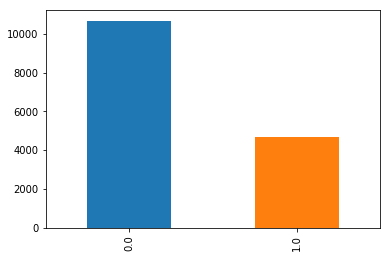

In [77]:
import matplotlib.pyplot as plt
y_train['NO_CPI_34'].value_counts().plot(kind='bar')
plt.show()

### 신경망 모형 만들기 

In [39]:
#target의 척도를 지정한다. 중요하다.
target_cat = pd.api.types.CategoricalDtype(categories=range(2), ordered=False)
print(target_cat.categories)

RangeIndex(start=0, stop=2, step=1)


In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15339, 1579)
(5114, 1579)
(15339, 1)
(5114, 1)


In [41]:
##nb = number
nb_tr_examples, nb_inputs = X_train.shape
#hidden layer
nb_units_hl_1 = 50
#output number를 타겟의 행과열의수 1
nb_outputs = y_train.shape[1]
print(nb_tr_examples, nb_inputs, nb_units_hl_1, nb_outputs)

15339 1579 50 1


In [51]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import metrics
from sklearn.metrics import f1_score

from keras.optimizers import SGD, Adam, RMSprop

In [90]:
import numpy
seed = 20181121
numpy. random.seed(seed)

# model parameters를 매개변수로 받아 모형을 동적으로 생성한다. 

def create_model(optimizer, lr, activation):
    
    model = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model.add(hl_1)
    hl_1_act = Activation(activation)
    model.add(hl_1_act)
    ol = Dense(nb_outputs)
    model.add(ol)
    ol_act = Activation(activation)
    model.add(ol_act)
    
    if optimizer == 'sgd':
        optim = SGD(lr=lr)
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)
    
    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['mae', 'acc'])
    
    return model

In [91]:
model = KerasClassifier(build_fn=create_model)

In [92]:
# 모형을 컴파일할 때와 컴파일된 모형을 훈력(fit)할 때 전달한 매개변수에
# 전달할 값들을 사전으로 만든다.
# 전달할 매개변수의 이름과 개수가 다른 경우에는 list of dictionaries를 만든다. 
optimizers = ['adam']
activations = ['sigmoid','relu','tanh']

lr = [0.001]

epochs = [15, 20, 30]
batches = [100, 500]

param_grid = dict(optimizer = optimizers, lr=lr, activation=activations, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3, random_state=20181121)

In [93]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['accuracy'], refit="accuracy", return_train_score=True, cv=kfold)

# KerasClassifier 내에서 target을 one-hot encoding하므로
# Keras NN model을 sklearn을 연결할 때 one-hot encoding 하지 않은 target을 사용한다. 

grid_result = grid.fit(X_train, y_train)

Epoch 1/15
10225/10225 [==============================] - 0s 40us/step - loss: 0.5578 - mean_absolute_error: 0.3837 - acc: 0.7085
Epoch 2/15
10225/10225 [==============================] - 0s 45us/step - loss: 0.4879 - mean_absolute_error: 0.3421 - acc: 0.7649
Epoch 3/15
10225/10225 [==============================] - 0s 45us/step - loss: 0.4462 - mean_absolute_error: 0.3131 - acc: 0.8018
Epoch 4/15
10225/10225 [==============================] - 0s 41us/step - loss: 0.4098 - mean_absolute_error: 0.2868 - acc: 0.8250
Epoch 5/15
10225/10225 [==============================] - 0s 39us/step - loss: 0.3864 - mean_absolute_error: 0.2672 - acc: 0.8398
Epoch 6/15
10225/10225 [==============================] - 0s 41us/step - loss: 0.3674 - mean_absolute_error: 0.2499 - acc: 0.8491
Epoch 7/15
10225/10225 [==============================] - 0s 38us/step - loss: 0.3562 - mean_absolute_error: 0.2388 - acc: 0.8507
Epoch 8/15
10225/10225 [==============================] - 0s 42us/step - loss: 0.3437 - me

10225/10225 [==============================] - 0s 42us/step - loss: 0.3120 - mean_absolute_error: 0.1989 - acc: 0.8688
Epoch 19/20
10225/10225 [==============================] - 0s 38us/step - loss: 0.3107 - mean_absolute_error: 0.1971 - acc: 0.8671
Epoch 20/20
10225/10225 [==============================] - 0s 36us/step - loss: 0.3066 - mean_absolute_error: 0.1951 - acc: 0.8699
Epoch 1/20
10226/10226 [==============================] - 0s 41us/step - loss: 0.5594 - mean_absolute_error: 0.3856 - acc: 0.7049
Epoch 2/20
10226/10226 [==============================] - 0s 38us/step - loss: 0.4925 - mean_absolute_error: 0.3456 - acc: 0.7607
Epoch 3/20
10226/10226 [==============================] - 0s 40us/step - loss: 0.4518 - mean_absolute_error: 0.3164 - acc: 0.7985
Epoch 4/20
10226/10226 [==============================] - 0s 36us/step - loss: 0.4168 - mean_absolute_error: 0.2904 - acc: 0.8221
Epoch 5/20
10226/10226 [==============================] - 0s 39us/step - loss: 0.3964 - mean_absolu

10225/10225 [==============================] - 0s 37us/step - loss: 0.3117 - mean_absolute_error: 0.1984 - acc: 0.8688
Epoch 21/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.3134 - mean_absolute_error: 0.1968 - acc: 0.8700
Epoch 22/30
10225/10225 [==============================] - 0s 37us/step - loss: 0.3057 - mean_absolute_error: 0.1952 - acc: 0.8693
Epoch 23/30
10225/10225 [==============================] - 0s 37us/step - loss: 0.3097 - mean_absolute_error: 0.1946 - acc: 0.8721
Epoch 24/30
10225/10225 [==============================] - 0s 39us/step - loss: 0.3078 - mean_absolute_error: 0.1949 - acc: 0.8689
Epoch 25/30
10225/10225 [==============================] - 0s 36us/step - loss: 0.2996 - mean_absolute_error: 0.1921 - acc: 0.8730
Epoch 26/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.2966 - mean_absolute_error: 0.1905 - acc: 0.8743
Epoch 27/30
10225/10225 [==============================] - 0s 37us/step - loss: 0.2969 - mean_a

10227/10227 [==============================] - 0s 36us/step - loss: 0.3025 - mean_absolute_error: 0.1930 - acc: 0.8713
Epoch 23/30
10227/10227 [==============================] - 0s 39us/step - loss: 0.3025 - mean_absolute_error: 0.1918 - acc: 0.8736
Epoch 24/30
10227/10227 [==============================] - 0s 36us/step - loss: 0.2990 - mean_absolute_error: 0.1910 - acc: 0.8740
Epoch 25/30
10227/10227 [==============================] - 0s 36us/step - loss: 0.2974 - mean_absolute_error: 0.1891 - acc: 0.8744
Epoch 26/30
10227/10227 [==============================] - 0s 39us/step - loss: 0.2960 - mean_absolute_error: 0.1889 - acc: 0.8749
Epoch 27/30
10227/10227 [==============================] - 0s 39us/step - loss: 0.2934 - mean_absolute_error: 0.1860 - acc: 0.8776
Epoch 28/30
10227/10227 [==============================] - 0s 37us/step - loss: 0.2915 - mean_absolute_error: 0.1858 - acc: 0.8771
Epoch 29/30
10227/10227 [==============================] - 0s 37us/step - loss: 0.2901 - mean_a

10225/10225 [==============================] - 0s 33us/step - loss: 0.4524 - mean_absolute_error: 0.3183 - acc: 0.7924
Epoch 10/20
10225/10225 [==============================] - 0s 32us/step - loss: 0.4414 - mean_absolute_error: 0.3116 - acc: 0.8025
Epoch 11/20
10225/10225 [==============================] - 0s 33us/step - loss: 0.4302 - mean_absolute_error: 0.3031 - acc: 0.8153
Epoch 12/20
10225/10225 [==============================] - 0s 34us/step - loss: 0.4195 - mean_absolute_error: 0.2959 - acc: 0.8227
Epoch 13/20
10225/10225 [==============================] - 0s 32us/step - loss: 0.4118 - mean_absolute_error: 0.2890 - acc: 0.8226
Epoch 14/20
10225/10225 [==============================] - 0s 33us/step - loss: 0.4011 - mean_absolute_error: 0.2814 - acc: 0.8317
Epoch 15/20
10225/10225 [==============================] - 0s 33us/step - loss: 0.3917 - mean_absolute_error: 0.2754 - acc: 0.8401
Epoch 16/20
10225/10225 [==============================] - 0s 32us/step - loss: 0.3834 - mean_a

10225/10225 [==============================] - 0s 33us/step - loss: 0.4300 - mean_absolute_error: 0.3018 - acc: 0.8097
Epoch 12/30
10225/10225 [==============================] - 0s 32us/step - loss: 0.4177 - mean_absolute_error: 0.2948 - acc: 0.8240
Epoch 13/30
10225/10225 [==============================] - 0s 33us/step - loss: 0.4090 - mean_absolute_error: 0.2871 - acc: 0.8270
Epoch 14/30
10225/10225 [==============================] - 0s 32us/step - loss: 0.3994 - mean_absolute_error: 0.2811 - acc: 0.8359
Epoch 15/30
10225/10225 [==============================] - 0s 32us/step - loss: 0.3901 - mean_absolute_error: 0.2734 - acc: 0.8408
Epoch 16/30
10225/10225 [==============================] - 0s 33us/step - loss: 0.3858 - mean_absolute_error: 0.2688 - acc: 0.8433
Epoch 17/30
10225/10225 [==============================] - 0s 33us/step - loss: 0.3773 - mean_absolute_error: 0.2618 - acc: 0.8476
Epoch 18/30
10225/10225 [==============================] - 0s 34us/step - loss: 0.3699 - mean_a

10227/10227 [==============================] - 0s 31us/step - loss: 0.4121 - mean_absolute_error: 0.2877 - acc: 0.8235
Epoch 14/30
10227/10227 [==============================] - 0s 32us/step - loss: 0.4031 - mean_absolute_error: 0.2812 - acc: 0.8307
Epoch 15/30
10227/10227 [==============================] - 0s 32us/step - loss: 0.3921 - mean_absolute_error: 0.2746 - acc: 0.8366
Epoch 16/30
10227/10227 [==============================] - 0s 33us/step - loss: 0.3842 - mean_absolute_error: 0.2690 - acc: 0.8426
Epoch 17/30
10227/10227 [==============================] - 0s 32us/step - loss: 0.3766 - mean_absolute_error: 0.2628 - acc: 0.8484
Epoch 18/30
10227/10227 [==============================] - 0s 32us/step - loss: 0.3705 - mean_absolute_error: 0.2570 - acc: 0.8494
Epoch 19/30
10227/10227 [==============================] - 0s 33us/step - loss: 0.3676 - mean_absolute_error: 0.2521 - acc: 0.8502
Epoch 20/30
10227/10227 [==============================] - 0s 32us/step - loss: 0.3628 - mean_a

10227/10227 [==============================] - 1s 50us/step - loss: 0.4083 - mean_absolute_error: 0.2708 - acc: 0.8120
Epoch 1/20
10225/10225 [==============================] - 0s 35us/step - loss: 1.1517 - mean_absolute_error: 0.4030 - acc: 0.6433
Epoch 2/20
10225/10225 [==============================] - 0s 35us/step - loss: 0.5186 - mean_absolute_error: 0.3339 - acc: 0.7588
Epoch 3/20
10225/10225 [==============================] - 0s 35us/step - loss: 0.4591 - mean_absolute_error: 0.3088 - acc: 0.7936
Epoch 4/20
10225/10225 [==============================] - 0s 33us/step - loss: 0.4355 - mean_absolute_error: 0.2798 - acc: 0.8211
Epoch 5/20
10225/10225 [==============================] - 0s 36us/step - loss: 0.4746 - mean_absolute_error: 0.2929 - acc: 0.8030
Epoch 6/20
10225/10225 [==============================] - 0s 35us/step - loss: 0.4478 - mean_absolute_error: 0.2774 - acc: 0.8148
Epoch 7/20
10225/10225 [==============================] - 0s 37us/step - loss: 0.9270 - mean_absolute

10225/10225 [==============================] - 0s 34us/step - loss: 0.5261 - mean_absolute_error: 0.3138 - acc: 0.7763
Epoch 3/30
10225/10225 [==============================] - 0s 37us/step - loss: 0.5619 - mean_absolute_error: 0.3399 - acc: 0.7429
Epoch 4/30
10225/10225 [==============================] - 0s 34us/step - loss: 0.6556 - mean_absolute_error: 0.3499 - acc: 0.7322
Epoch 5/30
10225/10225 [==============================] - 0s 35us/step - loss: 0.4654 - mean_absolute_error: 0.2969 - acc: 0.8097
Epoch 6/30
10225/10225 [==============================] - 0s 34us/step - loss: 0.4355 - mean_absolute_error: 0.2855 - acc: 0.8221
Epoch 7/30
10225/10225 [==============================] - 0s 38us/step - loss: 0.4333 - mean_absolute_error: 0.2629 - acc: 0.8385
Epoch 8/30
10225/10225 [==============================] - 0s 45us/step - loss: 0.3998 - mean_absolute_error: 0.2517 - acc: 0.8413
Epoch 9/30
10225/10225 [==============================] - 0s 49us/step - loss: 0.3770 - mean_absolute

10227/10227 [==============================] - 0s 35us/step - loss: 0.6862 - mean_absolute_error: 0.3143 - acc: 0.7669
Epoch 5/30
10227/10227 [==============================] - 0s 34us/step - loss: 0.4904 - mean_absolute_error: 0.3096 - acc: 0.7988
Epoch 6/30
10227/10227 [==============================] - 0s 34us/step - loss: 0.4277 - mean_absolute_error: 0.2860 - acc: 0.8278
Epoch 7/30
10227/10227 [==============================] - 0s 36us/step - loss: 0.6344 - mean_absolute_error: 0.3091 - acc: 0.7746
Epoch 8/30
10227/10227 [==============================] - 0s 41us/step - loss: 0.4755 - mean_absolute_error: 0.3103 - acc: 0.7984
Epoch 9/30
10227/10227 [==============================] - 0s 47us/step - loss: 0.4283 - mean_absolute_error: 0.2788 - acc: 0.8327
Epoch 10/30
10227/10227 [==============================] - 1s 50us/step - loss: 0.4213 - mean_absolute_error: 0.2644 - acc: 0.8365
Epoch 11/30
10227/10227 [==============================] - 1s 52us/step - loss: 0.4435 - mean_absolu

10227/10227 [==============================] - 0s 37us/step - loss: 0.5209 - mean_absolute_error: 0.3587 - acc: 0.7477
Epoch 7/15
10227/10227 [==============================] - 0s 36us/step - loss: 0.4898 - mean_absolute_error: 0.3419 - acc: 0.7650
Epoch 8/15
10227/10227 [==============================] - 0s 36us/step - loss: 0.4658 - mean_absolute_error: 0.3197 - acc: 0.7793
Epoch 9/15
10227/10227 [==============================] - 0s 39us/step - loss: 0.4421 - mean_absolute_error: 0.3037 - acc: 0.8012
Epoch 10/15
10227/10227 [==============================] - 0s 34us/step - loss: 0.4243 - mean_absolute_error: 0.2914 - acc: 0.8187
Epoch 11/15
10227/10227 [==============================] - 0s 35us/step - loss: 0.4389 - mean_absolute_error: 0.3005 - acc: 0.8151
Epoch 12/15
10227/10227 [==============================] - 0s 33us/step - loss: 0.4207 - mean_absolute_error: 0.2796 - acc: 0.8304
Epoch 13/15
10227/10227 [==============================] - 0s 34us/step - loss: 0.3774 - mean_abso

10227/10227 [==============================] - 0s 32us/step - loss: 1.5499 - mean_absolute_error: 0.3130 - acc: 0.7285
Epoch 14/20
10227/10227 [==============================] - 0s 31us/step - loss: 2.1698 - mean_absolute_error: 0.4140 - acc: 0.6236
Epoch 15/20
10227/10227 [==============================] - 0s 29us/step - loss: 2.7830 - mean_absolute_error: 0.2666 - acc: 0.7365
Epoch 16/20
10227/10227 [==============================] - 0s 29us/step - loss: 1.0828 - mean_absolute_error: 0.3571 - acc: 0.6881
Epoch 17/20
10227/10227 [==============================] - 0s 29us/step - loss: 0.8885 - mean_absolute_error: 0.3247 - acc: 0.7358
Epoch 18/20
10227/10227 [==============================] - 0s 30us/step - loss: 0.8141 - mean_absolute_error: 0.2745 - acc: 0.7849
Epoch 19/20
10227/10227 [==============================] - 0s 30us/step - loss: 0.6640 - mean_absolute_error: 0.2942 - acc: 0.7784
Epoch 20/20
10227/10227 [==============================] - 0s 33us/step - loss: 0.5288 - mean_a

10226/10226 [==============================] - 0s 41us/step - loss: 0.6710 - mean_absolute_error: 0.2937 - acc: 0.7824
Epoch 26/30
10226/10226 [==============================] - 0s 36us/step - loss: 0.5641 - mean_absolute_error: 0.2983 - acc: 0.7832
Epoch 27/30
10226/10226 [==============================] - 0s 41us/step - loss: 0.7777 - mean_absolute_error: 0.2723 - acc: 0.7892
Epoch 28/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.9127 - mean_absolute_error: 0.3158 - acc: 0.7398
Epoch 29/30
10226/10226 [==============================] - 0s 42us/step - loss: 1.5075 - mean_absolute_error: 0.3676 - acc: 0.6598
Epoch 30/30
10226/10226 [==============================] - 0s 30us/step - loss: 0.9565 - mean_absolute_error: 0.3045 - acc: 0.7516
Epoch 1/30
10227/10227 [==============================] - 0s 29us/step - loss: 1.3152 - mean_absolute_error: 0.4069 - acc: 0.6465
Epoch 2/30
10227/10227 [==============================] - 0s 29us/step - loss: 0.5650 - mean_abs

10226/10226 [==============================] - 0s 36us/step - loss: 0.4130 - mean_absolute_error: 0.2778 - acc: 0.8391
Epoch 13/15
10226/10226 [==============================] - 0s 37us/step - loss: 0.3994 - mean_absolute_error: 0.2716 - acc: 0.8419
Epoch 14/15
10226/10226 [==============================] - 0s 38us/step - loss: 0.5736 - mean_absolute_error: 0.3515 - acc: 0.7289
Epoch 15/15
10226/10226 [==============================] - 0s 37us/step - loss: 0.4383 - mean_absolute_error: 0.2953 - acc: 0.8242
Epoch 1/15
10227/10227 [==============================] - 1s 49us/step - loss: 4.8788 - mean_absolute_error: 1.2788 - acc: 0.0087
Epoch 2/15
10227/10227 [==============================] - 0s 47us/step - loss: 4.2395 - mean_absolute_error: 1.1060 - acc: 0.1229
Epoch 3/15
10227/10227 [==============================] - 0s 38us/step - loss: 1.0099 - mean_absolute_error: 0.4549 - acc: 0.6190
Epoch 4/15
10227/10227 [==============================] - 0s 41us/step - loss: 0.5450 - mean_absol

10227/10227 [==============================] - 0s 37us/step - loss: 0.5074 - mean_absolute_error: 0.3404 - acc: 0.7599
Epoch 5/20
10227/10227 [==============================] - 0s 37us/step - loss: 0.4713 - mean_absolute_error: 0.3095 - acc: 0.7920
Epoch 6/20
10227/10227 [==============================] - 0s 36us/step - loss: 0.4599 - mean_absolute_error: 0.2973 - acc: 0.8220
Epoch 7/20
10227/10227 [==============================] - 0s 37us/step - loss: 0.4363 - mean_absolute_error: 0.2896 - acc: 0.8300
Epoch 8/20
10227/10227 [==============================] - 0s 37us/step - loss: 0.4727 - mean_absolute_error: 0.2951 - acc: 0.8216
Epoch 9/20
10227/10227 [==============================] - 0s 37us/step - loss: 0.8319 - mean_absolute_error: 0.3884 - acc: 0.6787
Epoch 10/20
10227/10227 [==============================] - 0s 36us/step - loss: 0.4722 - mean_absolute_error: 0.3200 - acc: 0.7956
Epoch 11/20
10227/10227 [==============================] - 0s 38us/step - loss: 0.4993 - mean_absolu

10226/10226 [==============================] - 0s 39us/step - loss: 0.3860 - mean_absolute_error: 0.2605 - acc: 0.8562
Epoch 17/30
10226/10226 [==============================] - 0s 36us/step - loss: 0.3698 - mean_absolute_error: 0.2479 - acc: 0.8608
Epoch 18/30
10226/10226 [==============================] - 0s 42us/step - loss: 0.4700 - mean_absolute_error: 0.3058 - acc: 0.8093
Epoch 19/30
10226/10226 [==============================] - 0s 37us/step - loss: 0.3722 - mean_absolute_error: 0.2514 - acc: 0.8556
Epoch 20/30
10226/10226 [==============================] - 0s 36us/step - loss: 0.3976 - mean_absolute_error: 0.2651 - acc: 0.8342
Epoch 21/30
10226/10226 [==============================] - 0s 39us/step - loss: 0.3475 - mean_absolute_error: 0.2345 - acc: 0.8621
Epoch 22/30
10226/10226 [==============================] - 0s 37us/step - loss: 0.3337 - mean_absolute_error: 0.2263 - acc: 0.8669
Epoch 23/30
10226/10226 [==============================] - 0s 38us/step - loss: 1.8355 - mean_a

10226/10226 [==============================] - 0s 32us/step - loss: 1.0265 - mean_absolute_error: 0.4761 - acc: 0.5272
Epoch 4/15
10226/10226 [==============================] - 0s 29us/step - loss: 0.7789 - mean_absolute_error: 0.4002 - acc: 0.6764
Epoch 5/15
10226/10226 [==============================] - 0s 33us/step - loss: 0.6821 - mean_absolute_error: 0.3979 - acc: 0.6765
Epoch 6/15
10226/10226 [==============================] - 0s 30us/step - loss: 0.5926 - mean_absolute_error: 0.3643 - acc: 0.7419
Epoch 7/15
10226/10226 [==============================] - 0s 30us/step - loss: 0.5429 - mean_absolute_error: 0.3442 - acc: 0.7635
Epoch 8/15
10226/10226 [==============================] - 0s 30us/step - loss: 0.5162 - mean_absolute_error: 0.3440 - acc: 0.7659
Epoch 9/15
10226/10226 [==============================] - 0s 32us/step - loss: 0.5116 - mean_absolute_error: 0.3339 - acc: 0.7760
Epoch 10/15
10226/10226 [==============================] - 0s 31us/step - loss: 0.5141 - mean_absolut

10226/10226 [==============================] - 0s 30us/step - loss: 1.5074 - mean_absolute_error: 0.5661 - acc: 0.3871
Epoch 16/20
10226/10226 [==============================] - 0s 31us/step - loss: 0.7981 - mean_absolute_error: 0.3790 - acc: 0.6753
Epoch 17/20
10226/10226 [==============================] - 0s 31us/step - loss: 0.6432 - mean_absolute_error: 0.3798 - acc: 0.6947
Epoch 18/20
10226/10226 [==============================] - 0s 32us/step - loss: 0.6038 - mean_absolute_error: 0.3679 - acc: 0.7037
Epoch 19/20
10226/10226 [==============================] - 0s 31us/step - loss: 0.5799 - mean_absolute_error: 0.3608 - acc: 0.7056
Epoch 20/20
10226/10226 [==============================] - 0s 30us/step - loss: 0.5634 - mean_absolute_error: 0.3579 - acc: 0.7090
Epoch 1/20
10227/10227 [==============================] - 0s 32us/step - loss: 2.2651 - mean_absolute_error: 0.6210 - acc: 0.3800
Epoch 2/20
10227/10227 [==============================] - 0s 30us/step - loss: 2.8556 - mean_abs

10226/10226 [==============================] - 0s 34us/step - loss: 0.6652 - mean_absolute_error: 0.3963 - acc: 0.6631
Epoch 8/30
10226/10226 [==============================] - 0s 32us/step - loss: 0.5610 - mean_absolute_error: 0.3696 - acc: 0.7286
Epoch 9/30
10226/10226 [==============================] - 0s 32us/step - loss: 0.5310 - mean_absolute_error: 0.3461 - acc: 0.7565
Epoch 10/30
10226/10226 [==============================] - 0s 31us/step - loss: 0.5046 - mean_absolute_error: 0.3397 - acc: 0.7686
Epoch 11/30
10226/10226 [==============================] - 0s 32us/step - loss: 0.4922 - mean_absolute_error: 0.3317 - acc: 0.7745
Epoch 12/30
10226/10226 [==============================] - 0s 31us/step - loss: 0.4853 - mean_absolute_error: 0.3277 - acc: 0.7805: 0s - loss: 0.4788 - mean_absolute_error: 0.3266 - acc: 0.7
Epoch 13/30
10226/10226 [==============================] - 0s 31us/step - loss: 0.4760 - mean_absolute_error: 0.3252 - acc: 0.7892
Epoch 14/30
10226/10226 [============

15339/15339 [==============================] - 1s 38us/step - loss: 0.3341 - mean_absolute_error: 0.2129 - acc: 0.8568
Epoch 10/30
15339/15339 [==============================] - 1s 38us/step - loss: 0.3323 - mean_absolute_error: 0.2101 - acc: 0.8566
Epoch 11/30
15339/15339 [==============================] - 1s 37us/step - loss: 0.3311 - mean_absolute_error: 0.2089 - acc: 0.8578
Epoch 12/30
15339/15339 [==============================] - 1s 38us/step - loss: 0.3307 - mean_absolute_error: 0.2077 - acc: 0.8594
Epoch 13/30
15339/15339 [==============================] - 1s 39us/step - loss: 0.3279 - mean_absolute_error: 0.2055 - acc: 0.8609
Epoch 14/30
15339/15339 [==============================] - 1s 38us/step - loss: 0.3253 - mean_absolute_error: 0.2044 - acc: 0.8598
Epoch 15/30
15339/15339 [==============================] - 1s 38us/step - loss: 0.3235 - mean_absolute_error: 0.2038 - acc: 0.8606
Epoch 16/30
15339/15339 [==============================] - 1s 38us/step - loss: 0.3195 - mean_a

In [94]:
for k in grid_result.cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_activation
param_batch_size
param_epochs
param_lr
param_optimizer
params
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy
split0_train_accuracy
split1_train_accuracy
split2_train_accuracy
mean_train_accuracy
std_train_accuracy


In [95]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850055 using {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.849534 (0.002007) with: {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 15, 'lr': 0.001, 'optimizer': 'adam'}
0.837017 (0.010415) with: {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 20, 'lr': 0.001, 'optimizer': 'adam'}
0.850055 (0.003149) with: {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.821696 (0.004807) with: {'activation': 'sigmoid', 'batch_size': 500, 'epochs': 15, 'lr': 0.001, 'optimizer': 'adam'}
0.834539 (0.003899) with: {'activation': 'sigmoid', 'batch_size': 500, 'epochs': 20, 'lr': 0.001, 'optimizer': 'adam'}
0.846600 (0.004651) with: {'activation': 'sigmoid', 'batch_size': 500, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.842819 (0.011422) with: {'activation': 'relu', 'batch_size': 100, 'epochs': 15, 'lr': 0.001, 'optimizer': 'adam'}
0.787144 (0.065018) with: {'activation': 'relu', 'batch_

In [96]:
grid_result.score(X_test, y_test)

0.8494329292139225

### Keras 에서 metrics에서 f1, recall, precision이 제거 되어 sklearn의 f1 score을 이용하여 확인

In [109]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pred = grid_result.predict(X_test)

print("f1: {:.2f}".format(f1_score(y_test, pred)))
print("recall: {:.2f}".format(recall_score(y_test, pred)))
print("precision_score: {:.2f}".format(precision_score(y_test, pred)))

f1: 0.69
recall: 0.58
precision_score: 0.87


#### 모형에 f1 score를 적용하기 위해 f1 score 를 구현

In [114]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [115]:
import numpy
seed = 20181121
numpy. random.seed(seed)

# model parameters를 매개변수로 받아 모형을 동적으로 생성한다. 

def create_model_f1(optimizer, lr, activation):
    
    model = Sequential()
    hl_1 = Dense(nb_units_hl_1, input_dim = nb_inputs)
    model.add(hl_1)
    hl_1_act = Activation(activation)
    model.add(hl_1_act)
    ol = Dense(nb_outputs)
    model.add(ol)
    ol_act = Activation(activation)
    model.add(ol_act)
    
    if optimizer == 'sgd':
        optim = SGD(lr=lr)
    if optimizer == 'rmsprop':
        optim = RMSprop(lr=lr)
    if optimizer == 'adam':
        optim = Adam(lr=lr)
    
    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=[f1])
    
    return model

model = KerasClassifier(build_fn=create_model_f1)

In [116]:
# 모형을 컴파일할 때와 컴파일된 모형을 훈력(fit)할 때 전달한 매개변수에
# 전달할 값들을 사전으로 만든다.
# 전달할 매개변수의 이름과 개수가 다른 경우에는 list of dictionaries를 만든다. 
optimizers = ['adam']
activations = ['sigmoid','relu','tanh']

lr = [0.001]

epochs = [30]
batches = [100]

param_grid = dict(optimizer = optimizers, lr=lr, activation=activations, epochs=epochs, batch_size=batches)

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3, random_state=20181121)

In [117]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['accuracy'], refit="accuracy", return_train_score=True, cv=kfold)

# KerasClassifier 내에서 target을 one-hot encoding하므로
# Keras NN model을 sklearn을 연결할 때 one-hot encoding 하지 않은 target을 사용한다. 

grid_result = grid.fit(X_train, y_train, verbose=0)

In [118]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849664 using {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.849664 (0.005351) with: {'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.748289 (0.060705) with: {'activation': 'relu', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}
0.794120 (0.069934) with: {'activation': 'tanh', 'batch_size': 100, 'epochs': 30, 'lr': 0.001, 'optimizer': 'adam'}


In [119]:
pred = grid_result.predict(X_test)

print("f1: {:.2f}".format(f1_score(y_test, pred)))
print("recall: {:.2f}".format(recall_score(y_test, pred)))
print("precision_score: {:.2f}".format(precision_score(y_test, pred)))

f1: 0.68
recall: 0.58
precision_score: 0.84


모형이 더 개선되지 않아. 데이터의 전처리가 필요하면 신경망 모형을 더 복작하게 할 필요성이 있다.

In [78]:
from sklearn.externals import joblib
# save the model to disk
filename = 'NN_peiodontitis_model.sav'
joblib.dump(grid_result, filename)


['NN_peiodontitis_model.sav']

In [80]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8435666797027767
